<a href="https://colab.research.google.com/github/Ankit6539/ALMABETTERGIT/blob/main/TED_TALKS_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT NAME** : ***TED TALKS VIEWS PREDICTION**






Project Type - Regression

Contribution - Self






**PROBLEM DESCRIPTION** :-
TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life.

As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore , Jimmy Wales, Shahrukh Khan, and Bill Gates.

The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

DATA USED : data_ted_talks.csv - provided by AlmaBetter

**BUSINESS CONTEXT**:
A company that runs a video sharing platform, similar to TED, wants to create a machine learning model to predict the number of views a video will receive. This model would allow the company to prioritize which videos to feature on the homepage, send push notifications about, and potentially increase advertising revenue by identifying popular videos. Additionally, the company can also use this model to give feedback to its speakers on how to improve their talks and increase their views. The model will be trained on historical data of TedTalk videos and their corresponding views

**Project Work flow**

Importing Libraries
Loading the Dataset
EDA on features
Feature Engineering
Data Cleaning
Feature selection
Fitting the regression models and HyperParameter Tuning
Comparison of Models
Final selection of the model

**DATA** **PREPARATION**

In [ ]:
#  Importing libraries.
import pandas as pd
import numpy as np                                                       # Importing for data manupulation.
from numpy import math

import seaborn as sns                                                    # For visualisation.
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import ast                                                               # For converting the string list dtype.
import datetime as dt

from sklearn.preprocessing import OneHotEncoder                          # To encode the categorical variable.
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler                           # For feature scaling.


from sklearn.model_selection import train_test_split                     # For splitting the data into training and testing dataset.
from sklearn.model_selection import RandomizedSearchCV                   # To cover the randomness of the data.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression                        # Model implementation.
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import metrics                                              # For models evaluation.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.feature_selection import SelectFromModel                    # To select the features for ML model.

from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor                        # for ml models.
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

import xgboost as xgb
from xgboost import plot_importance

import lightgbm

In [ ]:

#Importing the Dataset:
df=pd.read_csv("/content/drive/MyDrive/data_ted_talks.csv")

In [ ]:

# first five Rows of dataset
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [ ]:

#Checking the column names:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

The views column is the dependent variable rest of them are feature column

Let's see if we can understand what do these columns mean:

**The dataset contains features like **

talk_id: Talk identification number provided by TED

title: Title of the talk

speaker_1: First speaker in TED's speaker list

all_speakers: Speakers in the talk

occupations: Occupations of the speakers

about_speakers: Blurb about each speaker

recorded_date: Date the talk was recorded

published_date: Date the talk was published to TED.com

event: Event or medium in which the talk was given

native_lang: Language the talk was given in

available_lang: All available languages (lang_code) for a talk

comments: Count of comments

duration: Duration in seconds

topics: Related tags or topics for the talk

related_talks: Related talks (key='talk_id',value='title')

url: URL of the talk

description: Description of the talk

transcript: Full transcript of the talk

***And the target variable***

views : Count of views

Let's try to get the basic info out of Data set in an organized manner using a function:

In [ ]:
#function to get a summary of our Dataset
def DataInfoAll(df):
    print(f"df Shape: {df.shape}")
    print("-"*75)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Null/ Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['First Row'] = df.iloc[0].values
    summary['Second Row'] = df.iloc[1].values


    return summary


In [ ]:

DataInfoAll(df)

df Shape: (4005, 19)
---------------------------------------------------------------------------


,Name,dtypes,Null/ Missing,Uniques,First Row,Second Row
0,talk_id,int64,0,4005,1,92
1,title,object,0,4005,Averting the climate crisis,The best stats you've ever seen
2,speaker_1,object,0,3274,Al Gore,Hans Rosling
3,all_speakers,object,4,3306,{0: 'Al Gore'},{0: 'Hans Rosling'}
4,occupations,object,522,2049,{0: ['climate advocate']},{0: ['global health expert; data visionary']}
5,about_speakers,object,503,2977,{0: 'Nobel Laureate Al Gore focused the world’...,"{0: 'In Hans Rosling’s hands, data sings. Glob..."
6,views,int64,0,3996,3523392,14501685
7,recorded_date,object,1,1334,2006-02-25,2006-02-22
8,published_date,object,0,2962,2006-06-27,2006-06-27
9,event,object,0,459,TED2006,TED2006


**We can clearly see that there are a few missing values in**

occupations

about_speakers

comments

and most of the feature variables are categorical




and most of the feature variables are categorical.

**we can see no that there are no NaN values left, now we can proceed to do other stuffs**

***Let's check for duplicate columns:***

In [ ]:
df.duplicated().sum()

0

There is no duplicate values, that's a good sign

**Categorizing Variable types**

1- data_categorical = data[['title', 'speaker_1', 'all_speakers', 'occupations',


'about_speakers', 'native_lang', 'available_lang','topics', 'related_talks', 'url', 'description', 'transcript' ]]

2- data_numerical= data[[ 'talk_id' , 'views' , 'duration' , 'comments' ]]

3- data_target_variable(Y) = data[['views']]

In [ ]:

df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [ ]:
data_numerical=df[['views', 'duration','comments','talk_id']]

In [ ]:
data_categorical= df[['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'native_lang', 'available_lang']]

Before we start with other columns let's change the dates from object to Datetime format.

In [ ]:
df['recorded_date'] = pd.to_datetime(df['recorded_date'], format = '%Y-%m-%d')
df['published_date'] = pd.to_datetime(df['published_date'], format = '%Y-%m-%d')

In [ ]:
# extracting date, month, year from published date and adding to dataset
from datetime import datetime
from datetime import timedelta
import calendar

#Extracting month from published_date column
df['published_month'] = pd.DatetimeIndex(df['published_date']).month
df['published_month'] = df['published_month'].apply(lambda x: calendar.month_abbr[x])

#Extracting day from published_date column
df['published_day'] = pd.DatetimeIndex(df['published_date']).day

#Extracting year from published_date column
df['published_year'] = pd.DatetimeIndex(df['published_date']).year

#Extracting week day from published_date
df['dayofweek'] = df['published_date'].dt.day_name()

#converting day of week to day [1-mon,2-tue,3-wed,4-thr,5-fri,6-sat,0-sun]
df['dayofweek_num']= df['published_date'].apply(lambda a: a.strftime("%w")).astype('int64')

#calculating video age with respect to day by adding one day to last data value
df['video_age_day'] = df['published_date'].max() + timedelta(days=1)-(pd.DatetimeIndex(df['published_date']))
df['video_age_day'] = df['video_age_day'].dt.days
df.tail(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,related_talks,url,description,transcript,published_month,published_day,published_year,dayofweek,dayofweek_num,video_age_day
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,...,"{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...,Apr,28,2020,Tuesday,2,3
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,...,{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ...",Apr,30,2020,Thursday,4,1
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,...,"{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...,Apr,30,2020,Thursday,4,1


In [ ]:

#Creating a daily average views section
df['avg_daily_views'] = df['views'] / df['video_age_day']
df.sample(8)


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,url,description,transcript,published_month,published_day,published_year,dayofweek,dayofweek_num,video_age_day,avg_daily_views
3577,46580,The new political story that could change ever...,George Monbiot,{0: 'George Monbiot'},{0: ['journalist']},{0: 'As an investigative journalist and self-d...,2330562,2019-07-21,2019-07-26,TEDSummit 2019,...,https://www.ted.com/talks/george_monbiot_the_n...,"To get out of the mess we're in, we need a new...",Do you feel trapped in a broken economic model...,Jul,26,2019,Friday,5,280,8323.435714
2634,8799,American bipartisan politics can be saved -- h...,Bob Inglis,{0: 'Bob Inglis'},"{0: ['politician', 'energy optimist']}",{0: 'Former United States Congressman Bob Ingl...,2252088,2017-11-18,2018-01-18,TEDxBeaconStreet,...,https://www.ted.com/talks/bob_inglis_american_...,Former Republican member of the U.S. Congress ...,Imagine that you're a member of Congress. You'...,Jan,18,2018,Thursday,4,834,2700.345324
1118,1382,A TED speaker's worst nightmare,Colin Robertson,{0: 'Colin Robertson'},{0: ['social energy entrepreneur']},"{0: 'Colin Robertson is apparently ""attempting...",3353436,2012-03-01,2012-03-09,TED2012,...,https://www.ted.com/talks/improv_everywhere_a_...,Colin Robertson had 3 minutes on the TED stage...,Today I'm going to talk about unexpected disco...,Mar,9,2012,Friday,5,2975,1127.205378
320,677,Expanding your circle of compassion,Robert Thurman,{0: 'Robert Thurman'},{0: ['buddhist scholar']},{0: 'The first American to be ordained a Tibet...,351565,2009-10-01,2008-10-31,Chautauqua Institution,...,https://www.ted.com/talks/robert_thurman_expan...,It's hard to always show compassion -- even to...,I want to open by quoting Einstein's wonderful...,Oct,31,2008,Friday,5,4200,83.705952
3327,24331,The surprising reason you feel awful when you'...,Marco Sotomayor,{0: 'Marco Sotomayor'},NaN,NaN,2604981,2016-04-19,2019-03-22,TED-Ed,...,https://www.ted.com/talks/marco_a_sotomayor_th...,It starts with a tickle in your throat that be...,It starts with a tickle in your throat that be...,Mar,22,2019,Friday,5,406,6416.209360
3027,26946,The global goals we've made progress on -- and...,Michael Green,{0: 'Michael Green'},"{0: ['economist', 'social progress expert']}",{0: 'Michael Green is part of the team that ha...,1622994,2018-09-25,2018-11-08,We the Future,...,https://www.ted.com/talks/michael_green_the_gl...,"""We are living in a world that is tantalizingl...","In 2015, the leaders of the world made a big p...",Nov,8,2018,Thursday,4,540,3005.544444
2746,13022,How the arts help homeless youth heal and build,Malika Whitley,{0: 'Malika Whitley'},"{0: ['arts curator', 'activist']}",{0: 'Malika Whitley is an arts curator and act...,1024483,2017-11-28,2018-04-11,TED Residency,...,https://www.ted.com/talks/malika_whitley_how_t...,"Malika Whitley is the founder of ChopArt, an o...",Don't you love a good nap? (Laughter) Just ste...,Apr,11,2018,Wednesday,3,751,1364.158455
2277,2628,A political party for women's equality,Sandi Toksvig,{0: 'Sandi Toksvig'},"{0: ['broadcast personality', 'politician', 'a...",{0: 'Long revered in the UK for her wit and ca...,937476,2016-10-27,2016-11-21,TEDWomen 2016,...,https://www.ted.com/talks/sandi_toksvig_a_poli...,Women's equality won't just happen -- not unle...,I am so excited to be here. Everything in Amer...,Nov,21,2016,Monday,1,1257,745.804296


We can now see that the recorded_date and published_date columns are now in datetime format.

EXPLORATORY DATA ANALYSIS AND VISUALIZATION

Let's explore the numerical features of Ted talk dataset

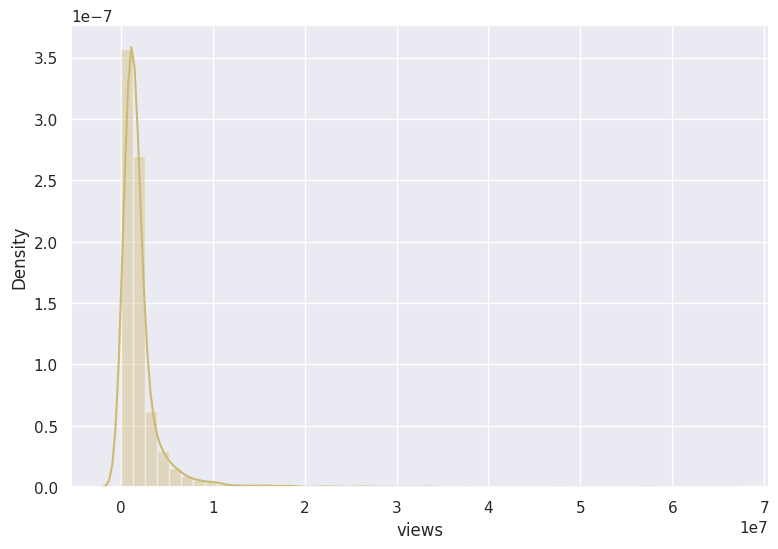

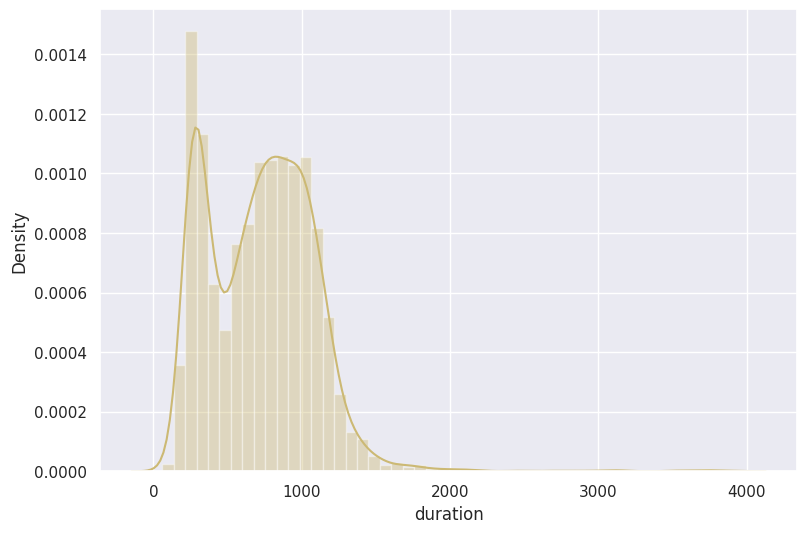

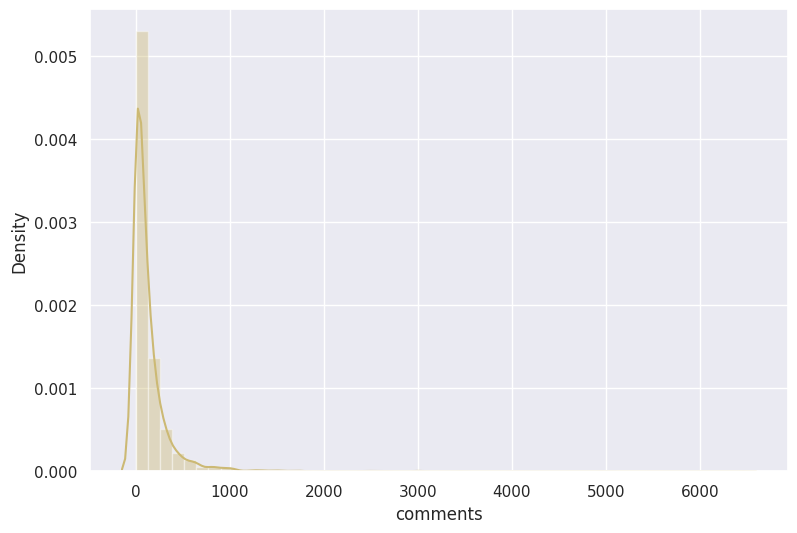

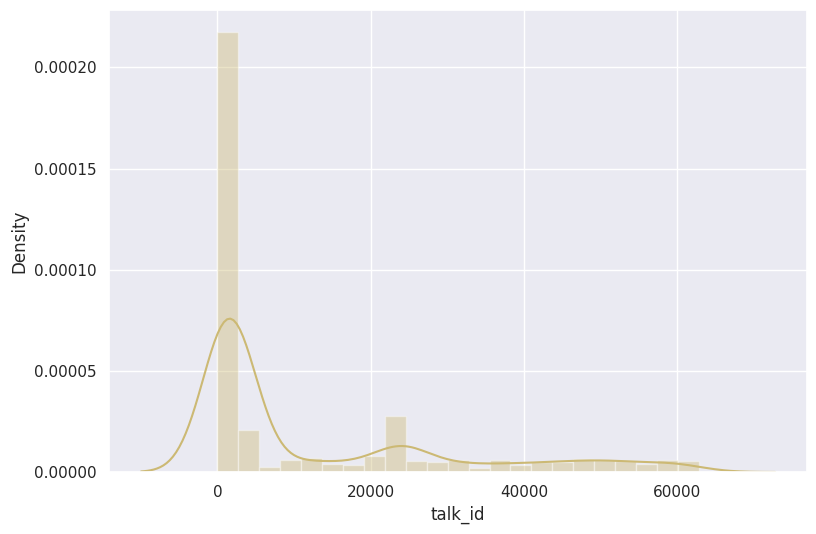

In [ ]:

# Distribution of dependent or Target Variable and independent variables

for col in data_numerical[1:]:
    plt.figure(figsize=(9, 6))
    sns.distplot(df[col],color="y")

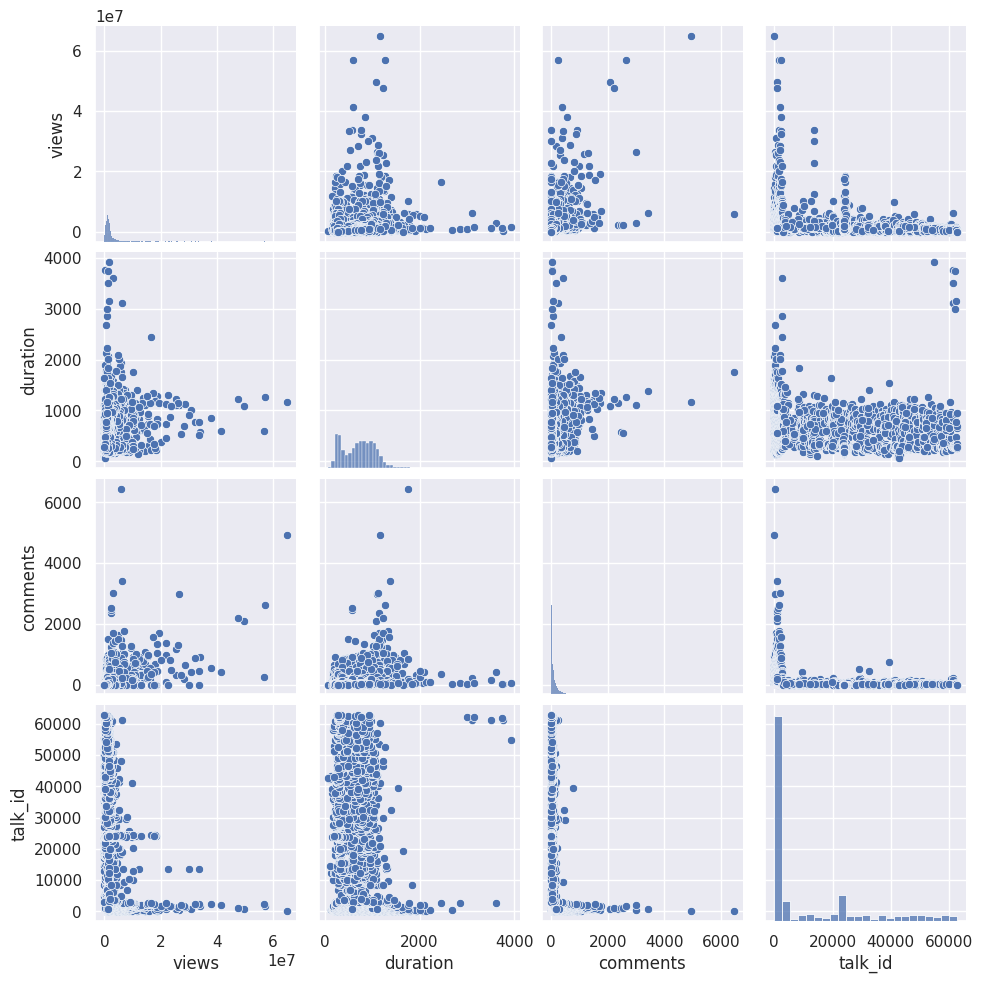

In [ ]:
# Pair plot of numerical data  outliers
sns.pairplot(data_numerical)
plt.show()

We can see that there are outliers in almost all numerical columns.

Now, let's look at the other columns in the Data sets to see what we can learn.

1. **Let's find the speaker with the highest views**:

In [ ]:
# Extarcting the records of top 10 most viewed Speaker
df_2 = df.groupby('speaker_1').agg({'views':'sum'})
df_2 = df_2.sort_values(['views'],ascending = False).reset_index().head(10)
df_2

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


Text(0.5, 1.0, 'Count')

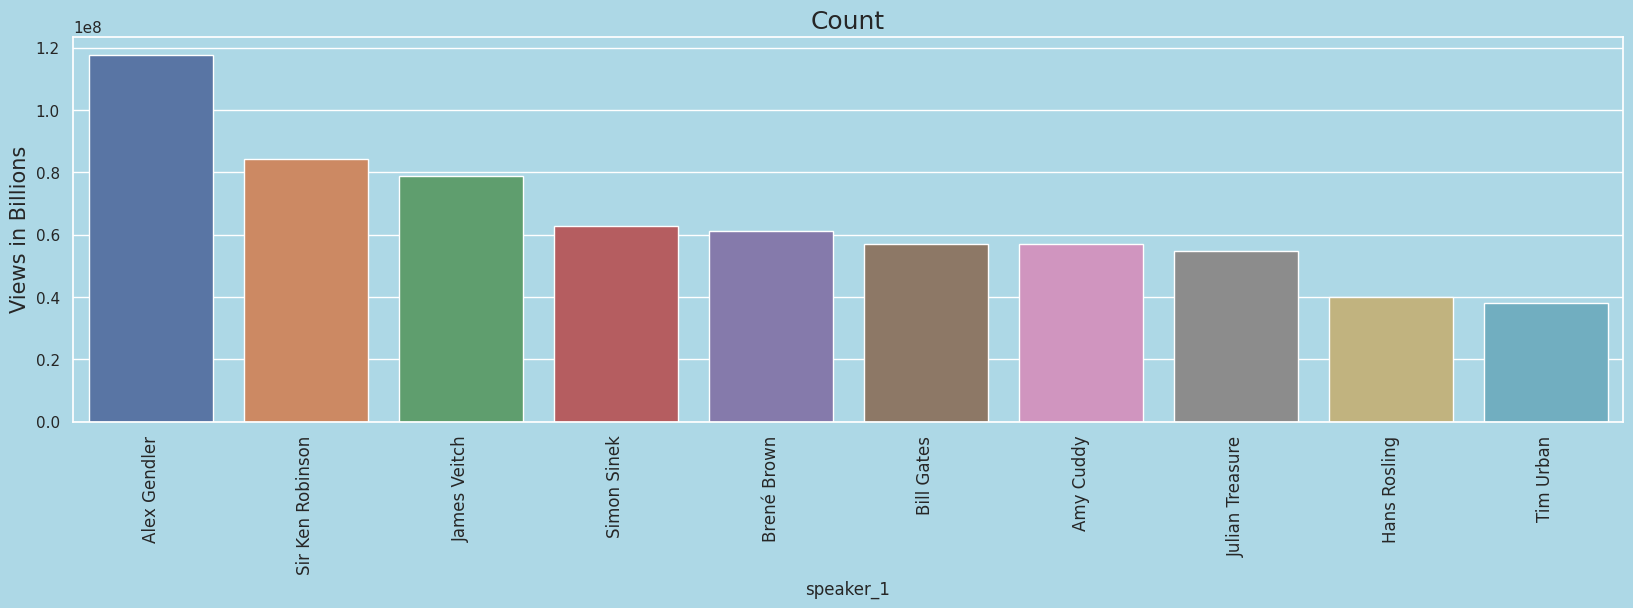

In [ ]:

# Barplot of speaker vs Views
plt.subplots(figsize=(20,5))
sns.barplot(data= df_2, x='speaker_1',y= 'views')
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Views in Billions',fontsize = 15)
plt.title('Count',fontsize = 18)

In [ ]:

# Rating the average views of the speaker_1 column
pop_speaker=df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_speaker=pop_speaker.to_dict()
pop_speaker=pop_speaker.values()
pop_speaker=  list(pop_speaker)[0]
df['speaker_1_avg_views']=df['speaker_1'].map(pop_speaker)

2. **Top five video with the highest views**:

Here we first sort the values of 'views' in ascending order and comparing it with 'title' and 'Speaker_1'

In [ ]:

# Let's findout the most viewed title and speaker
df_1 = df.sort_values(['views'],ascending=False).head()
df_1[['title','speaker_1', 'views' ]]

,title,speaker_1,views
4,Do schools kill creativity?,Sir Ken Robinson,65051954
1296,Your body language may shape who you are,Amy Cuddy,57074270
2062,This is what happens when you reply to spam email,James Veitch,56932551
646,How great leaders inspire action,Simon Sinek,49730580
796,The power of vulnerability,Brené Brown,47544833


Sir Ken Robinson's talk on "Do Schools Kill Creativity?" is the most popular TED Talk of all time with more than 65 million views.

It is closely followed by Amy Cuddy talk on "Your body language may shape who you are" with more than 57 million views.

There is only one talk that has crossed 60 million mark while 3 talks have crossed 50 million mark.

3.**Most popular event in TED talks**

Let's find out the Most popular Event in TED talks by comparing with Views

In [ ]:

# Comparing Event with respect to views
df_3 = df.groupby('event').agg({'views':'sum'})
df_3 = df_3.sort_values(['views'],ascending = False).reset_index().head(10)
df_3

,event,views
0,TED-Ed,1145357780
1,TED2015,247702961
2,TED2014,240295871
3,TEDGlobal 2013,235410234
4,TED2017,227847725
5,TED2016,227358612
6,TED2013,225967516
7,TED2012,197746106
8,TED2018,196346377
9,TED2009,191190144


Text(0.5, 1.0, 'Event')

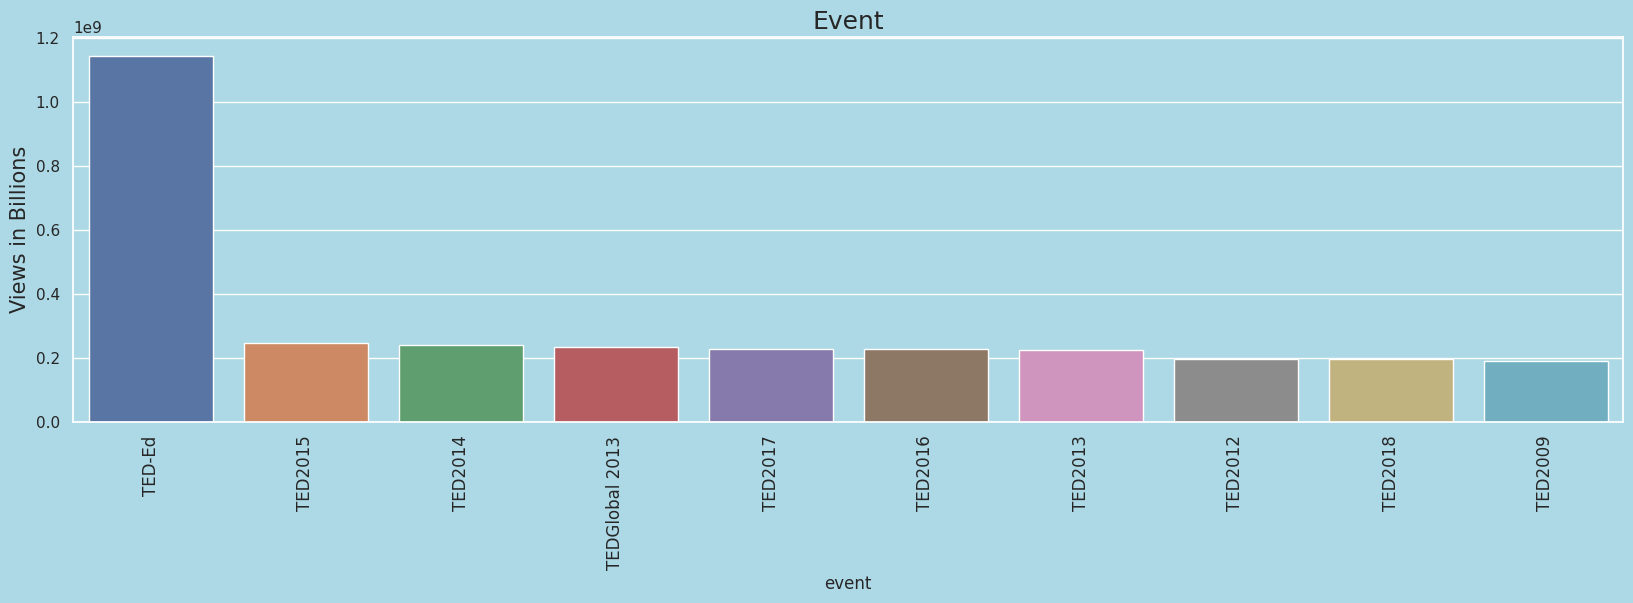

In [ ]:
# Box plot between TED talk Event and Views
plt.subplots(figsize=(20,5))
sns.barplot(data= df_3, x='event',y= 'views')
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Views in Billions',fontsize = 15)
plt.title('Event',fontsize = 18)

From above its clear that TED-Ed is the most Popular event of TED talk followed by TED2015 and TED2014

4. **Top 15 most Frequent Speaker's occupations**

Text(0.5, 1.0, 'Count')

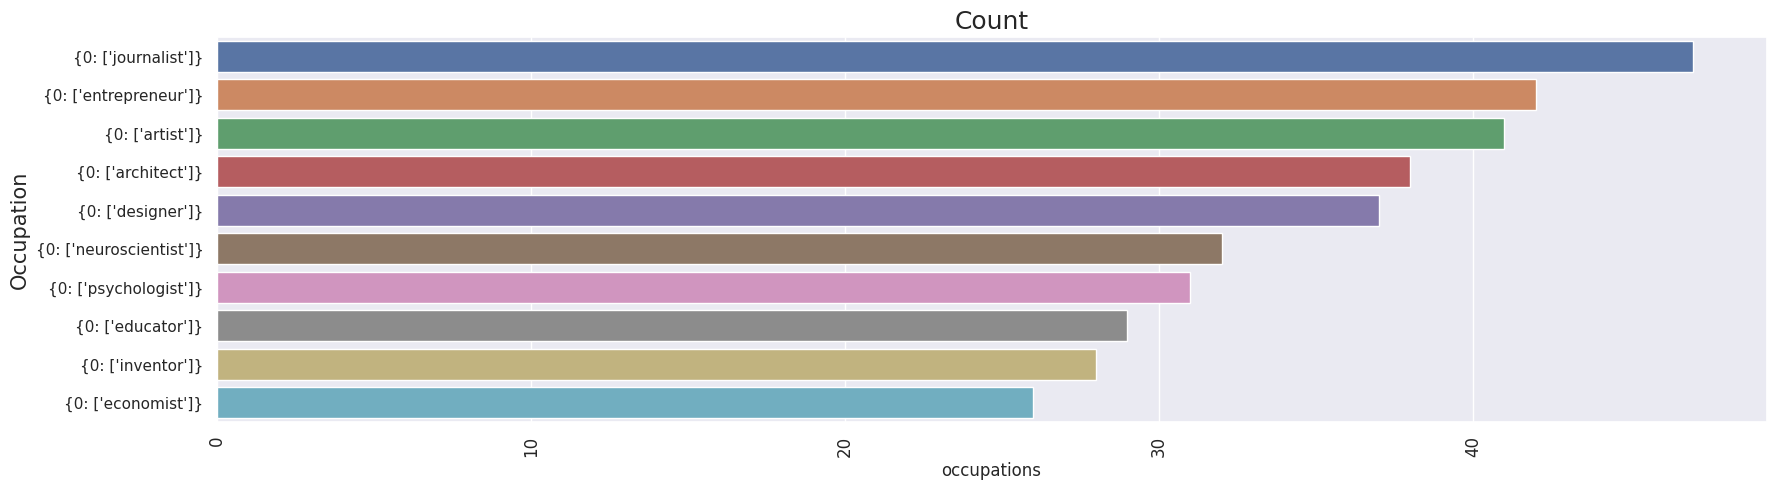

In [ ]:
#Printing the top 15 most frequent speaker's occupations

plt.rcParams["figure.figsize"] = (15,4)
occ_df = df['occupations'].value_counts()[1:].head(10).reset_index()
# Barplot of occupations with count
plt.subplots(figsize=(20,5))
sns.barplot(x = occ_df['occupations'], y = occ_df['index'])
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Occupation',fontsize = 15)
plt.title('Count',fontsize = 18)

The majority of the speakers work as writers, followed by journalists and entrepreneurs.

5. **Let's explore the title column and visualize the most frequent words in title**:

There are 157160 words in the combination of all titles.


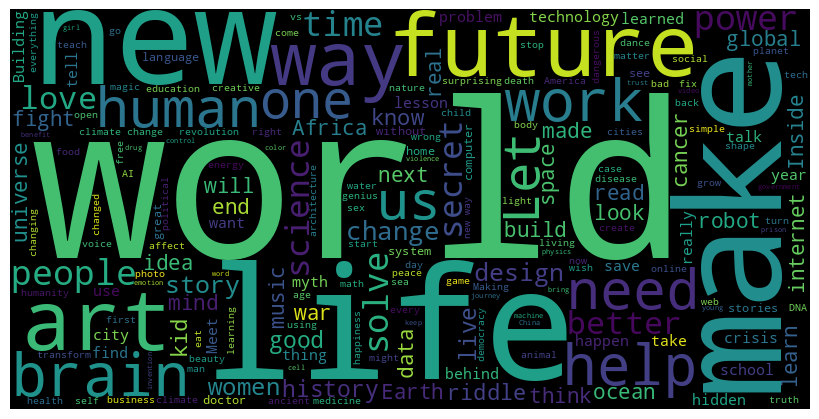

In [ ]:

#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator


#making of word cloud from title column
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud( width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


World and life are the most frequently used words in titles.

6. **Let's visualize most popular topic tags with word cloud**

There are 404126 words in the combination of all topics.


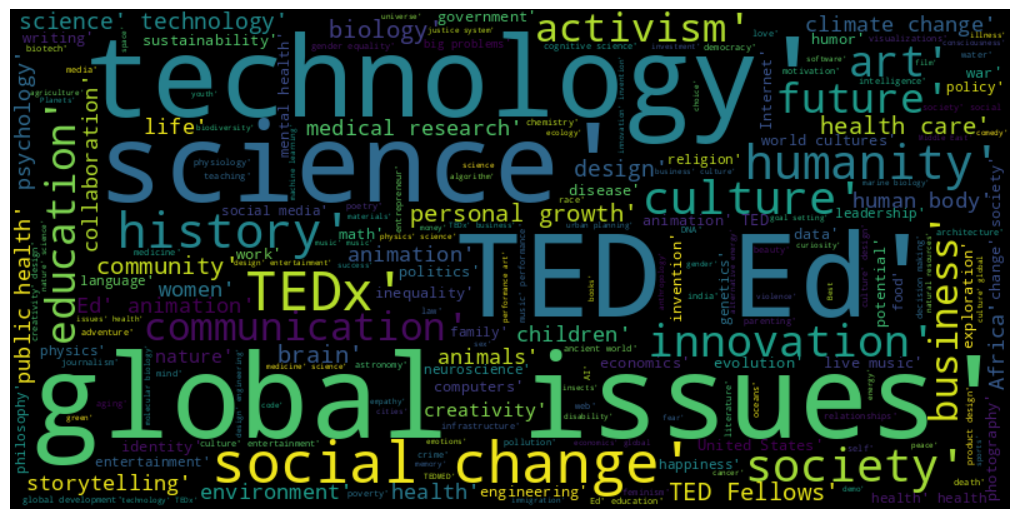

In [ ]:

text = " ".join(topic for topic in df.topics.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


Golbal issues, Technology, TED Ed and Science are the most popular topic tag.

7. **The frequency with which videos are uploaded throughout the year**

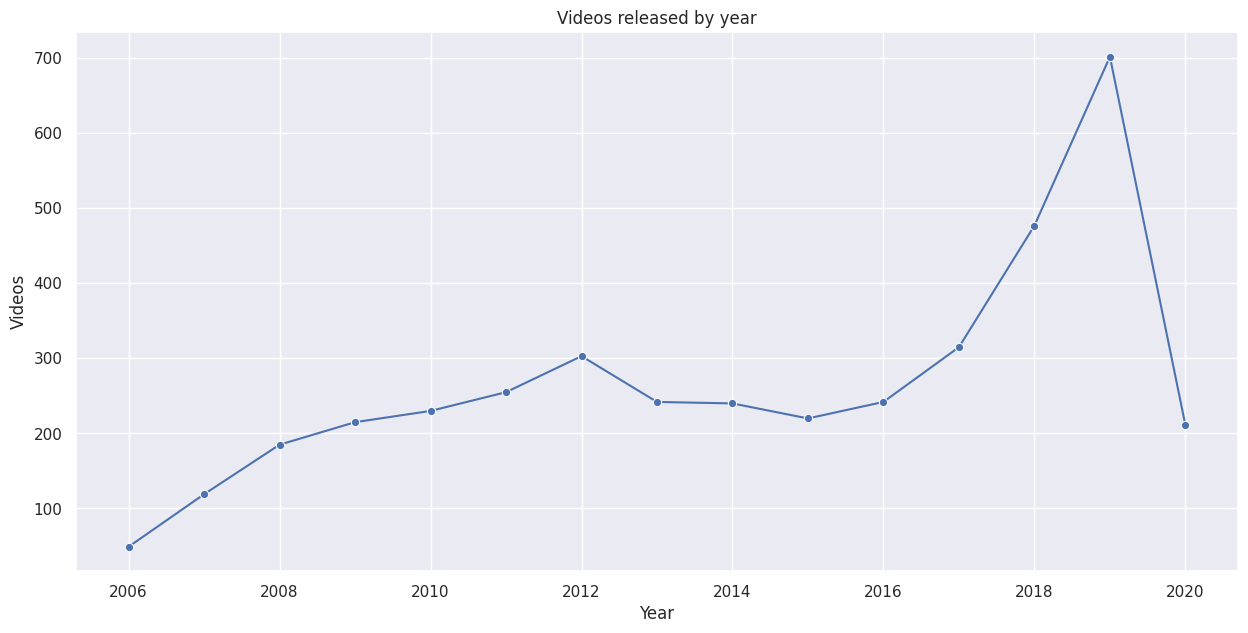

In [ ]:

# Plot between videos and videos released year
plt.figure(figsize=(15,7))
sns.lineplot(data=df['published_year'].value_counts(),marker = 'o');
plt.xlabel('Year');
plt.ylabel('Videos');
plt.title('Videos released by year');

The quantity of videos were gradually increasing every year but dropped drastically in 2020 due to pandemic.
The majority of videos were uploaded between 2018 and 2019.
8. **Let's check during which days most videos are released and what are it's view count**:

Text(0.5, 1.0, 'Day of The Week vs No.of Videos Uploaded')

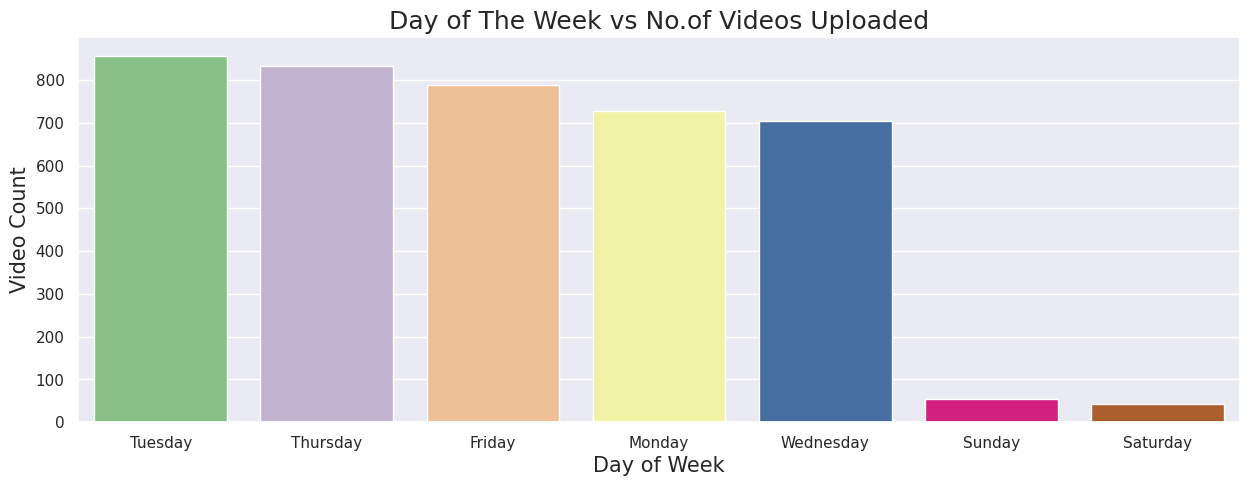

In [ ]:

# 8.1 Plot between week days with video count
sns.countplot(data = df ,x='dayofweek',palette ='Accent',order = df['dayofweek'].value_counts().index)
plt.xlabel('Day of Week',fontsize = 15)
plt.ylabel('Video Count',fontsize = 15)
plt.title('Day of The Week vs No.of Videos Uploaded',fontsize = 18)

Text(0.5, 1.0, 'Day of The Week vs Views in Billions')

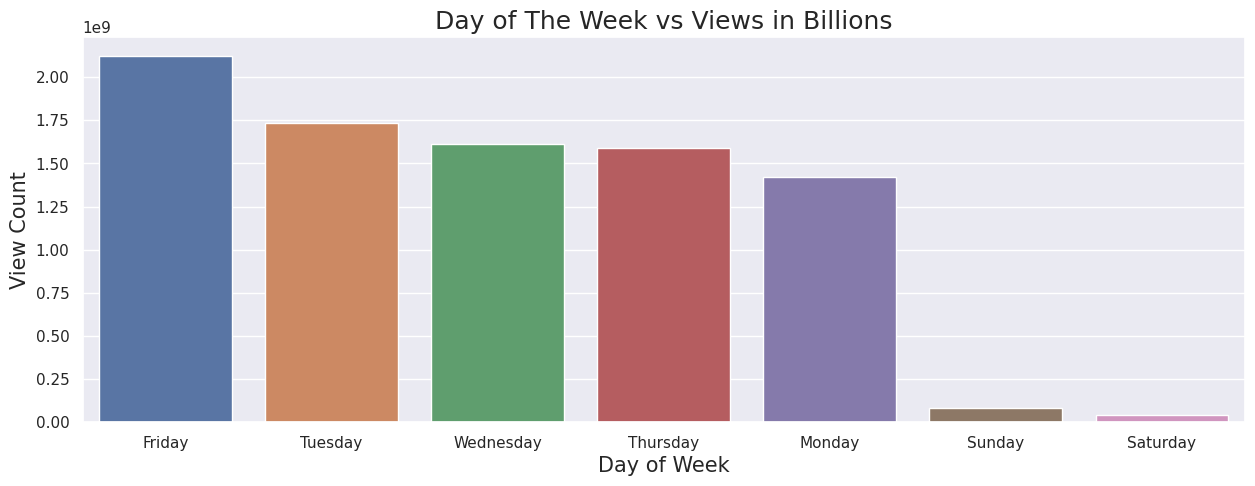

In [ ]:

#8.2 Plot between week days with views
total_views = df.groupby('dayofweek')['views'].sum().reset_index().sort_values('views',ascending= False)
sns.barplot(x='dayofweek',y='views' ,data =total_views,order= total_views['dayofweek'].value_counts().index)
plt.xlabel('Day of Week',fontsize = 15)
plt.ylabel('View Count',fontsize = 15)
plt.title('Day of The Week vs Views in Billions',fontsize = 18)

From first bar graph 8.1, we can clearly see that most of the TED talks are released in non-weekend days.

Most of the TED talks are released on Tuesday and Thursday followed by Friday.

Second graph 8.2, shows that most people watch TED talks on non-weekend days this is because of the reason that most of the TED talks are released in non-weekend days.

Friday and Tuesday have the most views, followed by Wednesday.

**9. Let's check during which month most videos are released and what are it's view count**

Text(0.5, 1.0, 'Month vs No. of videos')

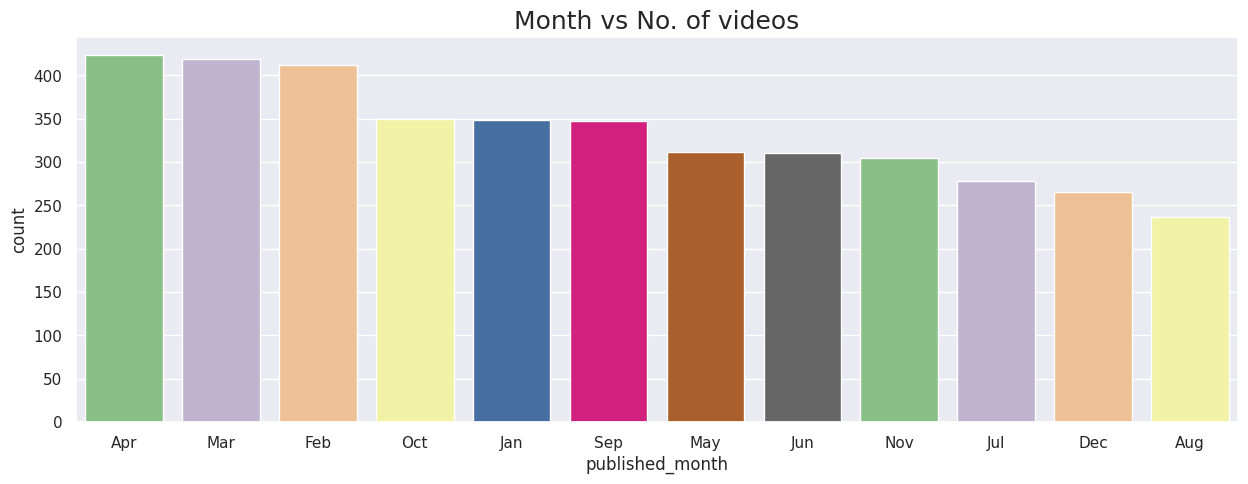

In [ ]:

# 9.1 Plot between month with respect to No. of videos
sns.countplot(data = df , x= 'published_month', palette ='Accent',order = df['published_month'].value_counts().index)
plt.title('Month vs No. of videos',fontsize = 18)

In [ ]:

# 9.2 Plot between Published month with Views
m_views = df.groupby('published_month')['views'].sum().reset_index().sort_values('views',ascending= False)

Text(0.5, 1.0, 'Month vs Views ')

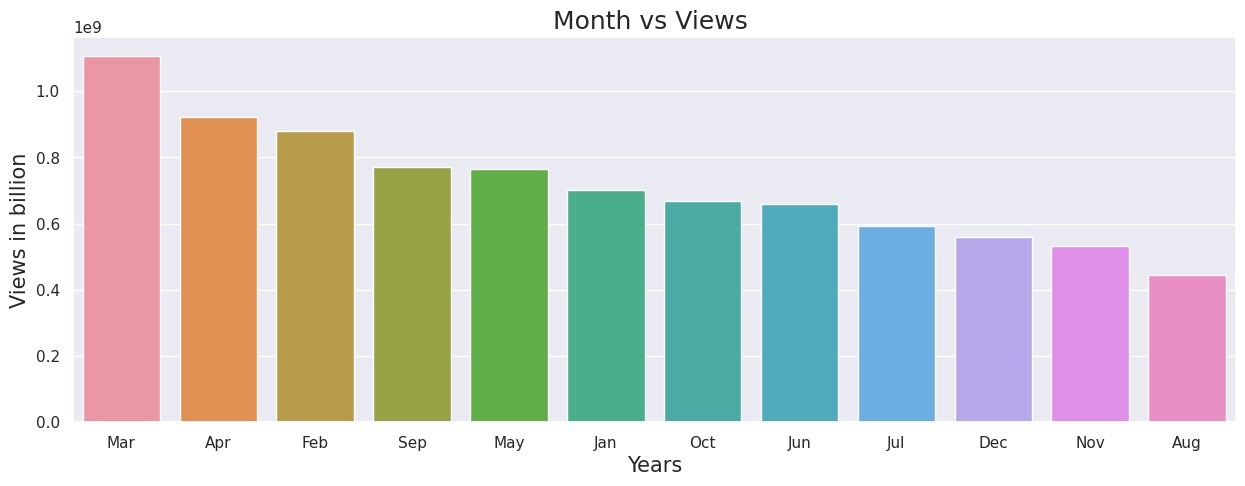

In [ ]:

sns.barplot(x = 'published_month', y ='views', data= m_views,order= m_views['published_month'].value_counts().index)
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Views in billion',fontsize = 15)
plt.title('Month vs Views ',fontsize = 18)

From first graph 9.1, on an average the number of talks released in the month of April, March followed by February are higher.
The number of talks released in August and December are comparatively lower than other months.
From second graph 9.2, we can see that August, November and December months seems to have less views, While March and April months have most number of views


10. **Let's check during which year most videos are released and what are it's view count**:

Text(0.5, 1.0, 'Year vs No. of videos')

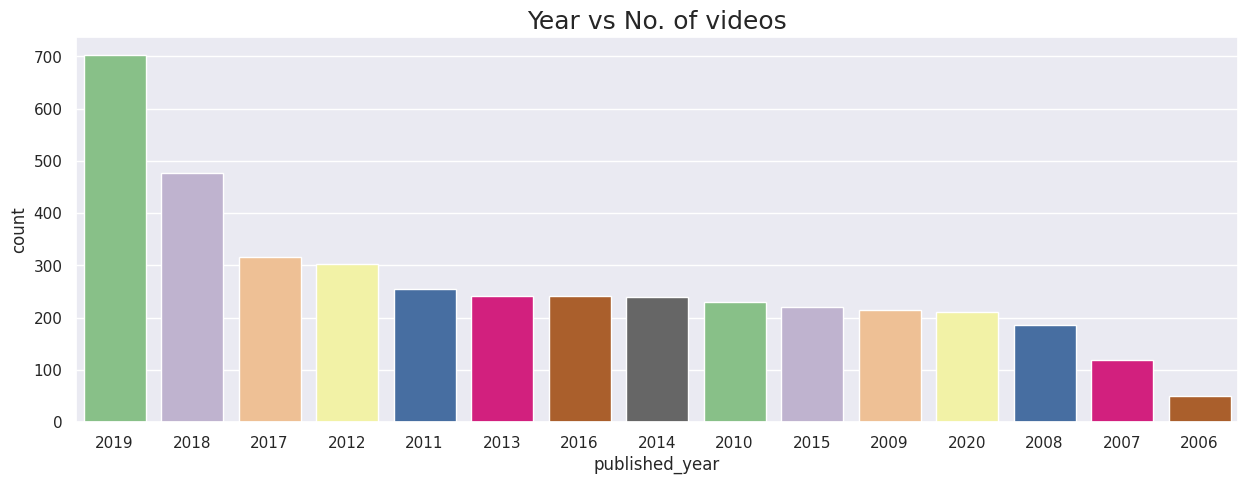

In [ ]:

# 10.1 Plot between Published Year with respect to No.of videos uploaded
sns.countplot(data = df , x= 'published_year', palette ='Accent',order =df['published_year'].value_counts().index)
plt.title('Year vs No. of videos',fontsize = 18)

In [ ]:

# 10.2 Plot between Published year with the views
y_views = df.groupby('published_year')['views'].sum().reset_index().sort_values('views',ascending= False)

Text(0.5, 1.0, 'Year vs Views ')

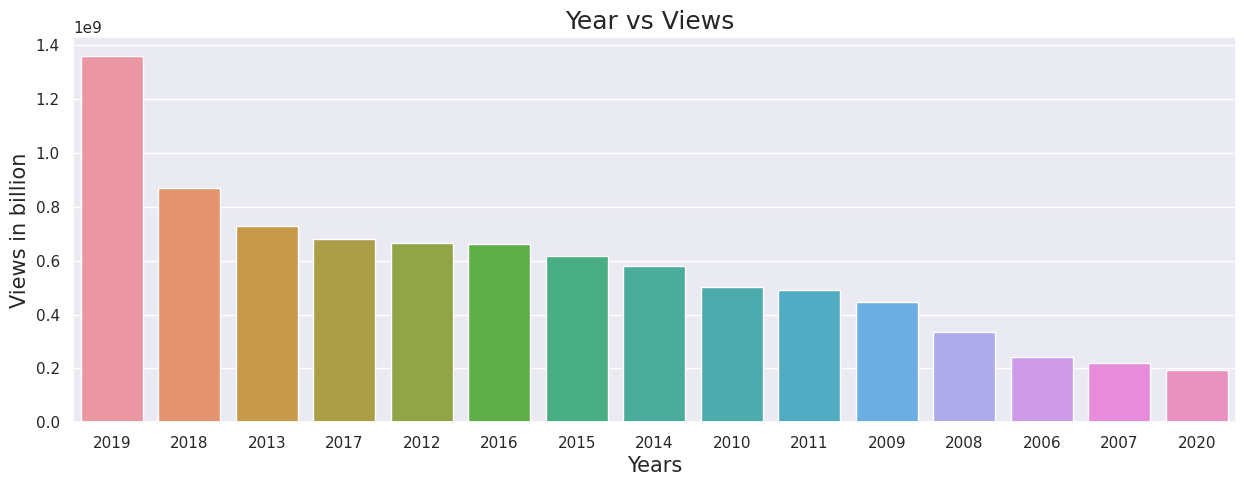

In [ ]:

sns.barplot(x = 'published_year', y ='views', data= y_views, order= y_views['published_year'].value_counts().index)
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Views in billion',fontsize = 15)
plt.title('Year vs Views ',fontsize = 18)

According to the first bar graph 10.1, more TED talks were published in 2019 and 2018 followed by in 2012
The second bar graph 10.2 shows that there were more views in 2019 and 2018, and less views in 2006, 2007 and 2020.
Let's remove the unnecessary columns now that we have finished visualizing the columns we believe to be necessary, and then we'll Feature the columns we do have:


**FEATURE SELECTION**

In [ ]:
len(df['speaker_1'].unique())

3274

In [ ]:
#target encoding
#Doing target encoding on speaker_1 column
pop_speaker=df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_speaker=pop_speaker.to_dict()
pop_speaker=pop_speaker.values()
pop_speaker=  list(pop_speaker)[0]
df['speaker_1_avg_views']=df['speaker_1'].map(pop_speaker)
df['speaker_1_avg_views']

0       2.190599e+06
1       3.987156e+06
2       2.156190e+06
3       1.979411e+06
4       2.812684e+07
            ...     
4000    8.569210e+05
4001    3.071870e+05
4002    4.644140e+05
4003    5.658200e+04
4004    0.000000e+00
Name: speaker_1_avg_views, Length: 4005, dtype: float64

<Axes: xlabel='speaker_1_avg_views', ylabel='Density'>

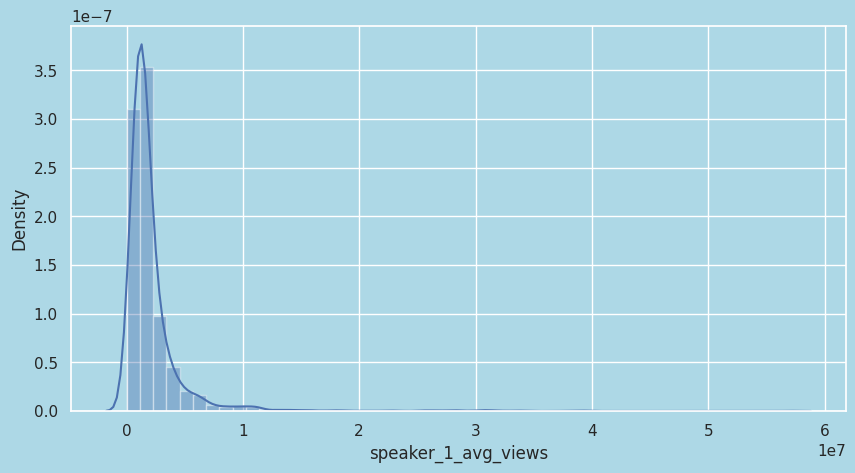

In [ ]:

#Let's plot the speaker_1_avg_views column
plt.figure(figsize=(10,5))
sns.distplot(df['speaker_1_avg_views'])

In [ ]:
#finding the unique events from the event column.
event_list=list(df.event.unique())
len(event_list)

459

In [ ]:
#applying target encoding on event column
pop_event=df.groupby('event').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_event=pop_event.to_dict()
pop_event=pop_event.values()
pop_event=  list(pop_event)[0]
df['event_wise_avg_views']=df['event'].map(pop_event)

<Axes: xlabel='event_wise_avg_views', ylabel='Density'>

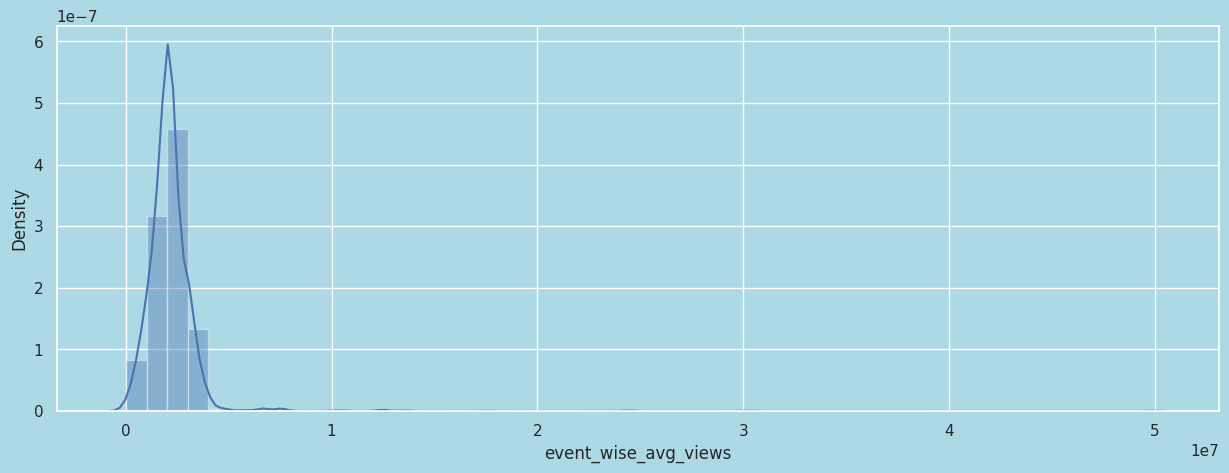

In [ ]:

#Plotting the distplot of event_wise_avg_views
sns.distplot(df['event_wise_avg_views'])

**Feature Engineering on available_lang column**


In available_lang column we have a list of available languages for each video

In [ ]:

#applying eval function on available_lang column
df['available_lang'] = df.apply(lambda row: eval(row['available_lang']), axis=1)

In [ ]:

len(df['available_lang'][0])

43

**Let's add a new feature which contain the count of total no of language for a particular video**

In [ ]:

df['num_of_lang'] = df.apply(lambda x: len(x['available_lang']), axis=1)

<Axes: xlabel='num_of_lang', ylabel='Density'>

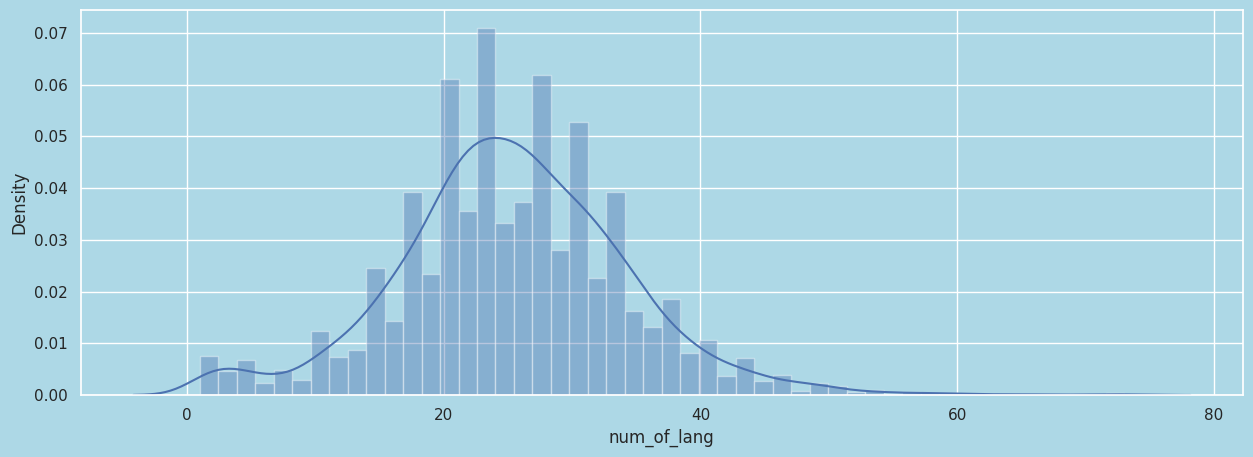

In [ ]:

sns.distplot(df['num_of_lang'])

**Feature Engineering on published_date column**.


We can add a new column called video_age which is the difference of current year and published year

In [ ]:
df['video_age']=2022-df['release_year']

KeyError: ignored

**Dropping the columns which has no effect on output**.

In [ ]:

#dropping the url column
df=df.drop(columns=['url'])
#dropping the available_lang column
df.drop(columns='available_lang',inplace=True)
#dropping published_date columns
df=df.drop(columns='published_date')

In [ ]:
#creating a copy of the dataframe
gf=df.copy()
df=gf.copy()

In [ ]:
#displaying first 5 rows
pd.set_option('display.max_columns',None)
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,event,native_lang,comments,duration,topics,related_talks,description,transcript,published_month,published_day,published_year,dayofweek,dayofweek_num,video_age_day,avg_daily_views,speaker_1_avg_views,event_wise_avg_views,num_of_lang
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,TED2006,en,272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Jun,27,2006,Tuesday,2,5057,696.735614,2.190599e+06,3.876291e+06,43
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,TED2006,en,628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",Jun,27,2006,Tuesday,2,5057,2867.645837,3.987156e+06,3.876291e+06,49
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,TED2006,en,124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",Jun,27,2006,Tuesday,2,5057,379.836267,2.156190e+06,3.876291e+06,26
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,TED2006,en,219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,Jun,27,2006,Tuesday,2,5057,526.808187,1.979411e+06,3.876291e+06,35
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,TED2006,en,4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,Jun,27,2006,Tuesday,2,5057,12863.744117,2.812684e+07,3.876291e+06,62


**** **Data Cleaning**

Outlier Treatment on numerical columns

In [ ]:

#checking the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

**We have outliers in few columns which needs to be treated well**.

I am replacing the outliers with the extreme values

In [ ]:
# Replacing outliers with extreme values
for i in ['comments','duration','num_of_lang','views','speaker_1_avg_views','event_wise_avg_views']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  df[i]=np.where(df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),df[i]))

In [ ]:

#Let's check the outliers again
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1



In [ ]:

df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'event', 'native_lang',
       'comments', 'duration', 'topics', 'related_talks', 'description',
       'transcript', 'published_month', 'published_day', 'published_year',
       'dayofweek', 'dayofweek_num', 'video_age_day', 'avg_daily_views',
       'speaker_1_avg_views', 'event_wise_avg_views', 'num_of_lang'],
      dtype='object')

**Let's drop unimportant columns.**

In [ ]:

#dropping unimportant columns from the dataframe.
df.drop(columns=['talk_id','title','speaker_1', 'all_speakers', 'occupations','event',
       'recorded_date','topics','related_talks','transcript','description','occupation','release_year','about_speakers'])

KeyError: ignored

In [ ]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,event,native_lang,comments,duration,topics,related_talks,description,transcript,published_month,published_day,published_year,dayofweek,dayofweek_num,video_age_day,avg_daily_views,speaker_1_avg_views,event_wise_avg_views,num_of_lang
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392.0,2006-02-25,TED2006,en,272.0,977.0,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Jun,27,2006,Tuesday,2,5057,696.735614,2190599.25,3.778944e+06,43.0
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",4009671.5,2006-02-22,TED2006,en,379.5,1190.0,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",Jun,27,2006,Tuesday,2,5057,2867.645837,3987156.10,3.778944e+06,47.5
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832.0,2006-02-24,TED2006,en,124.0,1286.0,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",Jun,27,2006,Tuesday,2,5057,379.836267,2156189.75,3.778944e+06,26.0
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069.0,2006-02-26,TED2006,en,219.0,1116.0,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,Jun,27,2006,Tuesday,2,5057,526.808187,1979411.00,3.778944e+06,35.0
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",4009671.5,2006-02-25,TED2006,en,379.5,1164.0,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,Jun,27,2006,Tuesday,2,5057,12863.744117,4129562.75,3.778944e+06,47.5


**Let's separate the dependent and independent variables**

In [ ]:

#separating the dependent and independent variables
y=df['views']
X=df.drop(columns='views')

In [ ]:

X

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,recorded_date,event,native_lang,comments,duration,topics,related_talks,description,transcript,published_month,published_day,published_year,dayofweek,dayofweek_num,video_age_day,avg_daily_views,speaker_1_avg_views,event_wise_avg_views,num_of_lang
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,2006-02-25,TED2006,en,272.0,977.0,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Jun,27,2006,Tuesday,2,5057,696.735614,2190599.25,3.778944e+06,43.0
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",2006-02-22,TED2006,en,379.5,1190.0,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",Jun,27,2006,Tuesday,2,5057,2867.645837,3987156.10,3.778944e+06,47.5
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,2006-02-24,TED2006,en,124.0,1286.0,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",Jun,27,2006,Tuesday,2,5057,379.836267,2156189.75,3.778944e+06,26.0
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2006-02-26,TED2006,en,219.0,1116.0,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,Jun,27,2006,Tuesday,2,5057,526.808187,1979411.00,3.778944e+06,35.0
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",2006-02-25,TED2006,en,379.5,1164.0,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,Jun,27,2006,Tuesday,2,5057,12863.744117,4129562.75,3.778944e+06,47.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",2020-04-22,TED2020: The Prequel,en,6.0,690.0,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B...",Apr,27,2020,Monday,1,4,125733.500000,856921.00,6.772082e+05,3.5
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,2020-04-27,TED-Ed,en,0.0,346.0,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo...",Apr,27,2020,Monday,1,4,76796.750000,307187.00,2.059996e+06,4.0
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,2019-06-22,TEDxMileHigh,en,9.0,774.0,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...","Many countries have an active, centuries-old l...",Picture yourself driving down the road tomo

Doing one hot encoding using get_dummies function

In [ ]:

#one hot encoding on categorical features
X=pd.get_dummies(X)
X.shape

(4005, 32105)

In [ ]:

X.head()

**Now, we have around 25 features after one hot encoding**

**Applying proper feature selection is must here to get rid of unimportant features**

**Let's treat nan values of numerical columns using KNNImputer**

In [ ]:

#checking for null values
X[['duration','comments']].isna().sum()

duration    0
comments    0
dtype: int64

**Here, we have around 655 NaN values in comments column**

**Let's treat it using KNNImputer**

In [ ]:
#Taking features for using in KNNImputer
outlier_df=['duration','comments','speaker_1_avg_views',	'event_wise_avg_views']

In [ ]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:

# Before applying KNNImputer, we have to scale features so avoid bias.
scaler = MinMaxScaler()
#Import libraries
from sklearn.impute import KNNImputer
# define imputer
imputer = KNNImputer()
#fitting the model
imputer.fit(scaler.fit_transform(X[outlier_df]))
# transform the dataset
X[outlier_df] = imputer.transform(scaler.fit_transform(X[outlier_df]))
#again applying inverse_transform on the data
X[outlier_df] = scaler.inverse_transform(X[outlier_df])

In [ ]:

#let's check for nan values again
X[['duration','comments']].isna().sum()

duration    0
comments    0
dtype: int64

**Now we don't have any nan values in comments column**

In [ ]:
X.head()

**6. Feature Selection**

In [ ]:

#printing the shape of features
X.shape


**Feature selection for numerical features using f_regression**

In [ ]:

#importing the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:

#The second array consists of p-values that we need. let's plot it
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='pink',figsize=(16,6))
plt.title('P-value scores for numerical features')
plt.show()


NameError: ignored

**From here using p value analysis we can drop those features having high p values**

In [ ]:

X.columns

Index(['talk_id', 'recorded_date', 'comments', 'duration', 'published_day',
       'published_year', 'dayofweek_num', 'video_age_day', 'avg_daily_views',
       'speaker_1_avg_views',
       ...
       'published_month_Nov', 'published_month_Oct', 'published_month_Sep',
       'dayofweek_Friday', 'dayofweek_Monday', 'dayofweek_Saturday',
       'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Tuesday',
       'dayofweek_Wednesday'],
      dtype='object', length=32105)

In [ ]:

#Let's take all the important features in a list.
ll=['comments', 'duration', 'num_of_lang',
       'release_day_Friday','speaker_1_avg_views',	'event_wise_avg_views']
len(ll)

6

In [ ]:

#let's take the important features

X=X[ll]


**Plotting the correlation matrix**

In [ ]:

# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(8,8))
sns.heatmap(X.corr(),annot=True, cmap='Spectral_r')

**Applying train test split**

In [ ]:

from sklearn.model_selection import train_test_split, KFold

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**7. Modeling and HyperParameter Tuning**

In [ ]:

#fitting the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [ ]:
#predicting the values for train and test set
y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

MSE  = mean_squared_error(y_test, y_test_pred)
print("MSE on test is" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE on test is" ,RMSE)

y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

**7.2 Random Forest Regressor**

In [ ]:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

In [ ]:


from sklearn import metrics

In [ ]:

#applying RandomForestRegressor on default parameters
rf = RandomForestRegressor(criterion='mae')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Target mean: {:0.2f}'.format(y.mean()))
print('Target std: {:0.2f}'.format(y.std()))

**It's not a good score but we can improve by doing some feature selection and by hyperparameter tuning.**

**Defining Parameter Dict for Hyperparameter Tuning**

In [ ]:

#Random Forest Regressor param_dict
n_estimators = [30,50,80,100,120,150]
max_depth = [4,6,8,10,12]
min_samples_split = [50,80,100,150,200]
min_samples_leaf = [10,30,40,50,60,80]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

** Hyperparameter Tuning using Randomized Search CV**

In [ ]:


from sklearn.model_selection import RandomizedSearchCV

In [ ]:

# Create an instance of the random forest regressor
rf_model = RandomForestRegressor(criterion='mae')

#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=0,cv=5)
rf_random.fit(X_train,y_train)

In [ ]:

#finding the optimal model w.r.t. best_estimator_
rf_optimal_model = rf_random.best_estimator_

In [ ]:

rf_optimal_model

In [ ]:

#calculating the MAE on train and test set
y_pred = rf_optimal_model.predict(X_train)
y_test_pred = rf_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

**Applying XGboost regressor model**

In [ ]:
#XGBoost Regressor
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:

from xgboost import XGBRegressor
# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.1)
#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)
xgb_random.fit(X_train,y_train)

In [ ]:

#finding xgb_optimal_model
xgb_optimal_model = xgb_random.best_estimator_

In [ ]:

xgb_optimal_model

In [ ]:

y_pred = xgb_optimal_model.predict(X_train)
y_test_pred = xgb_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

** Comparison of different regressor Models**

The ML regressor models that we have used are :

Lasso Regressor

Ridge Regressor

KNearestNeighbors Regressor

Random Forest Regressor

XGB Regressor

Let's try all these models together and store the scores in a new dataframe


In [ ]:

from sklearn.linear_model import Ridge, Lasso
from sklearn import neighbors
import xgboost as xgb

In [ ]:

#Defining all these models
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=4,min_samples_leaf=30,min_samples_split=50,n_estimators=120,random_state=42)],
           ['XGBRegressor: ', xgb.XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=4, min_samples_leaf=50,
             min_samples_split=50, n_estimators=80)]
        ]

In [ ]:

#Let's run all the models and store the scores
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

In [ ]:
#printing the results dataframe
results_df = pd.DataFrame(model_data)
results_df

**Final selection of the model**

**We choose MAE and not RMSE as the deciding factor of our model selection because of the following reasons**

RMSE is heavily influenced by outliers as in the higher the values get the more the RMSE increases.

MAE doesn’t increase with outliers. MAE is linear and RMSE is quadratically increasing.

The best performing regressor model for this dataset is Random Forest Regressor on the basis of MAE

**plot the feature importance score w.r.t. Random Forest model**

In [ ]:

importances = pd.DataFrame({'Features': X.columns,
                                'Importances': rf_optimal_model.feature_importances_})

importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. RFRegressor model')

**plot the feature importance score w.r.t. XGBregressor model**

In [ ]:
importances = pd.DataFrame({'Features': X.columns,
                                'Importances': xgb_optimal_model.feature_importances_})

importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. XGBregressor model')
plt.show()

**CONCLUSION**


**EDA conclusion**

Alex Gendler is the most popular and has the most views.

With over 65 million views, Sir Ken Robinson's talk "Do Schools Kill Creativity?" is the most popular TED Talk of all time.

The most popular TED talk event is TED-Ed, followed by TED2015 and TED2014.

The majority of the speakers are writers, journalists, or business owners.

The majority of TED talks are released during the week. The most views are on Friday and Tuesday, followed by Wednesday.

Model Conclusion :

Since MSE and RMSE penalize outliers very much, we will use MAE as Evaluation metric.

For Train and Test MAE, Random Forest Regression and Gradient Boost produce relatively good results. XG Boost Regression, on the other hand, produced unsatisfactory results since there is a significant difference between train and test MAE.

Even though Decision tree and Random forest give us good train MSE results, the test errors are pretty high. Similarly, XG Boost Regression and Gradient Boost regression shows overfitting issue

For this Data Set, RMSE is not recommended. As we can see, there is a problem of underfitting.

For this Data Set, R2 produced the best results for each Regression Method. There is no overfitting, as shown by the Adjusted R2 result.

According to previous findings, Random Forest Regression produces the best results for each Evaluation Matric.

Most important feature is found to speaker_1_avg_view, that means, Views on a TedTalk majorly depends on the speaker.

More Popular Speaker gets more views